In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from surprise import Dataset, Reader
from surprise import SVDpp
from surprise.model_selection import GridSearchCV, cross_validate

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 28.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195838 sha256=fa8d927a95256378cf0a3f80c07d06e76c2733b753a6bc31dc0295b423ff3a9f
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/GTMSA/Text Mining/project/Reviews.csv')
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
ratings = df[['UserId', 'ProductId', 'Score']]

In [ ]:
len(ratings)

568454

Matrix Factorization-Based Algorithms

In [ ]:
# try surprise package
from surprise import Reader, SVDpp, accuracy, Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import GridSearchCV, train_test_split


# when importing from a DF, only need to specify the scale of the ratings.
reader = Reader(rating_scale=(1,5)) 
#Initialize a recommender instance and apply its function using surprise:
dataset = Dataset.load_from_df(ratings, reader)
trainset, testset = train_test_split(dataset, test_size=0.25)

Hyper-tuning for SVDpp parameters
- n factors: 50, 60 （50 better than 55, (50 better than 40)， (60 better than 70), 50 better than 45）(49 better than 48) (50 better than 49)
- n_epochs: 35, 40 (35 is better than 40)
- lr_all: 0.085 (0.25 better than 0.3) (0.12 better than 0.25) (0.09 better than 0.12) (0.085 better than 0.09)
- reg_all: 0.051 （0.1 better than 0.05）(0.08 better than 0.1) 0.07 better than 0.08 (0.06 better than 0.07)

Grid Search Method

In [ ]:
# Define the hyperparameter grid
# SVDpp with sgd, use gridsearch to tune parameters

param_grid = {
    'n_factors': [50],
    'n_epochs': [35],
    'lr_all': [0.085],
    'reg_all': [0.06],
    'random_state': [10086]
}
# Choose the best model
grid_search = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=8, n_jobs=-1)

grid_search.fit(dataset)

# best RMSE score
print("Best RMSE: ", grid_search.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print("Best hyperparameters: ", grid_search.best_params['rmse'])

Best RMSE:  0.9995167619814358
Best hyperparameters:  {'n_factors': 50, 'n_epochs': 35, 'lr_all': 0.085, 'reg_all': 0.06, 'random_state': 10086}


Train the SVDpp model and use the optimial parameters on the train set

In [ ]:
# Train the SVDpp algorithm using the best parameters on the trainset
algo = SVDpp(**grid_search.best_params['rmse'])
algo.fit(trainset)

# Test the trained model on the testset
predictions = algo.test(testset)

# Calculate RMSE for the testset predictions
rmse = accuracy.rmse(predictions)
print("RMSE on testset:", rmse)

RMSE: 1.0168
RMSE on testset: 1.0168002535825797


User ID: A3SGXH7AUHU8GW,
 Item ID: B001E4KFG0,
  Predicted Score: 4.98,
  Actual Rating: 5
User ID: A1D87F6ZCVE5NK,
 Item ID: B00813GRG4,
  Predicted Score: 1.04,
  Actual Rating: 1
User ID: ABXLMWJIXXAIN,
 Item ID: B000LQOCH0,
  Predicted Score: 4.01,
  Actual Rating: 4
User ID: A395BORC6FGVXV,
 Item ID: B000UA0QIQ,
  Predicted Score: 2.04,
  Actual Rating: 2
User ID: A1UQRSCLF8GW1T,
 Item ID: B006K2ZZ7K,
  Predicted Score: 5.00,
  Actual Rating: 5
User ID: ADT0SRK1MGOEU,
 Item ID: B006K2ZZ7K,
  Predicted Score: 4.54,
  Actual Rating: 4
User ID: A1SP2KVKFXXRU1,
 Item ID: B006K2ZZ7K,
  Predicted Score: 4.93,
  Actual Rating: 5
User ID: A3JRGQVEQN31IQ,
 Item ID: B006K2ZZ7K,
  Predicted Score: 4.99,
  Actual Rating: 5
User ID: A1MZYO9TZK0BBI,
 Item ID: B000E7L2R4,
  Predicted Score: 4.18,
  Actual Rating: 5
User ID: A21BT40VZCCYT4,
 Item ID: B00171APVA,
  Predicted Score: 4.98,
  Actual Rating: 5
User ID: A3HDKO7OW0QNK4,
 Item ID: B0001PB9FE,
  Predicted Score: 4.97,
  Actual Rating: 5
U

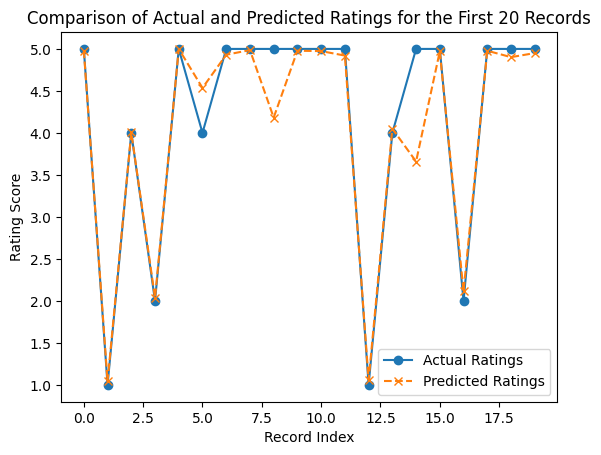

In [ ]:
# Get the first 20 records
first_20_records = ratings.iloc[:20]

predictions = []
for _, row in first_20_records.iterrows():
    user_id = row['UserId']
    item_id = row['ProductId']
    true_rating = row['Score']
    pred_rating = algo.predict(user_id, item_id).est
    predictions.append(pred_rating)
    print(f"User ID: {user_id},\n Item ID: {item_id},\n  Predicted Score: {pred_rating:.2f},\n  Actual Rating: {true_rating}")


actual_ratings = first_20_records['Score'].tolist()

# Plot the comparison between actual and predicted ratings
plt.plot(actual_ratings, label='Actual Ratings', marker='o', linestyle='-')
plt.plot(predictions, label='Predicted Ratings', marker='x', linestyle='--')
plt.xlabel('Record Index')
plt.ylabel('Rating Score')
plt.legend()
plt.title('Comparison of Actual and Predicted Ratings for the First 20 Records')
plt.show()